# Generating Price Data using Stocastic Processes

* Geometric Brownian Motion (GBM)
* Fractional Brownian Motion (FBM)
* Heston Stochastic Volatility Model
* Cox Ingersoll Ross (CIR)
* Ornstein Uhlebneck stochastic process


## Model Parameters

The model parameters class contains all of the parameters used by the following stochastic processes. The parameters have been prefixed with the name of the stochastic process they are used in. Calibration of the stochastic processes would involve looking for the parameter values which best fit some historical data.
*   `all_s0` This is the starting asset value
*   `all_time` This is the amount of time to simulate for
*   `all_delta` This is the delta, the rate of time e.g. 1/252 = daily, 1/12 = monthly
*   `all_sigma` This is the volatility of the stochastic processes
*   `gbm_mu` This is the annual drift factor for geometric brownian motion
*   `jumps_lamda` This is the probability of a jump happening at each point in time
*   `jumps_sigma` This is the volatility of the jump size
*   `jumps_mu` This is the average jump size
*   `cir_a` This is the rate of mean reversion for Cox Ingersoll Ross
*   `cir_mu` This is the long run average interest rate for Cox Ingersoll Ross
*   `all_r0` This is the starting interest rate value
*   `cir_rho` This is the correlation between the wiener processes of the Heston model
*   `ou_a` This is the rate of mean reversion for Ornstein Uhlenbeck
*   `ou_mu` This is the long run average interest rate for Ornstein Uhlenbeck
*   `sheston_a` This is the rate of mean reversion for volatility in the Heston model
*   `heston_mu` This is the long run average volatility for the Heston model
*   `heston_vol0` This is the starting volatility value for the Heston model

In [19]:
import os
import math # This is useful for 'math.isclose' when comparing floating point numbers - you comment this out if you don't need it.
import random
import pandas as pd
from typing import Optional

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import trade_flow.stochastic as sp 

%matplotlib inline

## Plot Utils

In [20]:

def plot_candlestick(df: pd.DataFrame, indicator: Optional[go.Scatter] = None):
    """ 
        Plotly Chart Demo - By TallTim

        What this does: Takes an input OHLCV dataframe with a single column label row before the data and renders a
        scrollable/zoomable chart

        This is NOT set up to do realtime data, though it could be adapted if you are clever. (Basically you'd
        reload the .csv as it updates from another source, and redraw the chart, but its beyond scope of this example.)

        This IS a way to tinker around with making indicators or other things with chart data.

        This assumes you have a python environment where pandas and plotly are installed. To install them, please refer
        to these websites:
        Pandas -- https://pandas.pydata.org/docs/getting_started/install.html - 'pip install pandas' should work, but details are on
        the site for specific environments. Required dependencies are NumPy, python-dateutil and pytz.
        Plotly -- https://plotly.com/python/getting-started/ - 'pip install plotly==5.15.0' should work, but details are on the site.

        Feel free to modify/share, just give me some credit for the template, thanks!

        Adapted from https://community.plotly.com/t/simple-example-candlestick-chart-from-csv-file/76183
    """
    # Here is where we define our plots - the top section takes up 70% of the display, the indicator uses the remainder
    fig = make_subplots(rows=2, row_heights=[0.70,0.30], cols=1, shared_xaxes=True, vertical_spacing=0.02) # Heights must add up to 1

    # Plotly Candlestick Chart - you could substitute here for other types...
    # Line Charts -- https://plotly.com/python/line-charts/ and there are more...
    fig.add_trace(
    				go.Candlestick(
    				x=df.index, # X-axis has our date/times
    				open=df['open'],
    				high=df['high'],
    				low=df['low'],
    				close=df['close'],
    				name="Price"), # Name on legend
    				row=1, col=1 # Top section, so first row/col
    )

    if indicator:
        # Add Fancy Indicator subplot with go.Scatter => go.Scatter(x=df.index, y=df[indicator], name="Fancy Indicator", line=dict(color='rgb(235,140,52)'))
        fig.add_trace(indicator, row=2, col=1) # Dark orange

    # Example of vertical line on a chart
    fig.add_vline(x=54, line=dict(color='rgb(52,183,235)', width=2, dash='dot')) # Light blue

    # Note: The fig.update_layout statements could be consolidated, but its just easier to read what each one does this way...

    # Remove rangeslider
    fig.update_layout(xaxis_rangeslider_visible=False)

    # Background color - Note, this is the plot background, not the 'Paper' or chart background
    fig.update_layout(plot_bgcolor='rgb(0,0,0)')

    # Axes line color -- Named color reference: (CSS colors) https://community.plotly.com/t/plotly-colours-list/11730/3
    fig.update_xaxes(showline=True, linewidth=1, linecolor='dimgray') # You can use named colors or rgb like below
    fig.update_yaxes(showline=True, linewidth=1, linecolor='dimgray')

    # Tick value display format - yaxis<num> is for subplots
    fig.update_layout(yaxis={"tickformat" : ','}, yaxis2={"tickformat" : '.2f'}) # Displays thousands,hundreds without scientific 'K' notation

    # Grid line color
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='dimgray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='dimgray')

    # Font color
    fig.update_layout(font = dict(color='rgb(160,166,184)')) # Light Gray

    # Chart title
    fig.update_layout(title="BTCUSD 5min", title_x=0.5, yaxis_title="Price", yaxis2_title="Indicator")

    # Legend Background Transparent Color, 'Paper' background color - plot canvas, sets pan enabled on load
    # If you don't like pan enabled - just remove it
    fig.update_layout(legend=dict(bgcolor='rgba(0,0,0,0)'), paper_bgcolor='rgb(12,12,12)', dragmode='pan')

    # Mouse wheel zoom -- if you prefer not to have zoom enabled, then remove this line
    config = dict({'scrollZoom' : True})

    # Render Chart -- remove config = config if you removed the above line
    fig.show(config = config)


# # I did my dev on a python virtual environment on a windows box - substitute with the path to your .csv file
# myDataPath = r'C:\Users\Tim\Documents\NinjaTrader 8\datadump' # The r is needed to make python read this properly

# # There may be a more elegant way to handle the file read, but this works well enough...
# # Get directory contents
# files = os.listdir(myDataPath)

# # Define Input File to search for -- just give it the beginning of the filename or whatever your .csv starts with.
# # You could also read more than a single file in if you assign it to another variable changing the startswith filename.

# Input_File = [file_  for file_ in files if file_.startswith('Input_BTCUSD_5_Minute_Demo')] # Returns file with Input prefix

# ## Debug - prints to the console as a sanity check you got the proper file
# print("\nFile parsing - Input File is: " + str(Input_File[0]))

# # Read into pandas dataframe
# df_Input = pd.read_csv(myDataPath + '/' + Input_File[0])

# # For reference, my .csv looked something like this:
# #
# # BarTimestamp,FancyIndicator,Open,High,Low,Close
# # 6/11/2023 7:30:00 AM,0.0208,25803.72,25804.04,25788.47,25797.74
# #
# # Because of how pandas dataframes work, it doesn't matter the order of the columns since you can select/assign them to
# # variables by their column names

# # Debug - This is a useful thing that tells you what your dataframe consists of, and other stats
# #print(df_Input.info())

# # Debug - This prints the dataframe contents - useful if you need to confirm things are being loaded correctly
# #print("Dataframe Input File Contents:" + df_Input.to_string())

# # Get number of dataframe rows and columns
# dataDimensions = df_Input.shape
# dataRows = dataDimensions[0]
# dataCols = dataDimensions[1]

# ## Debug - Gives the dimensions of your dataframe
# print("\nInput dataframe - Rows: " + str(dataRows) + " Columns: " + str(dataCols))


## Geometric Brownian Motion

/home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/trade_flow/stochastic/gbm.py:117: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_frame = price_frame["price"].resample(time_frame).ohlc()
/home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/trade_flow/stochastic/gbm.py:118: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_frame["volume"] = volume_frame["volume"].resample(time_frame).sum()


<Axes: >

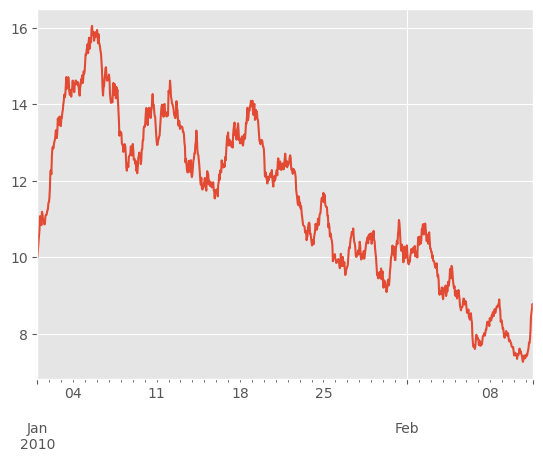

In [21]:
data = sp.gbm(
    base_price=10,
    base_volume=5,
    start_date="2010-01-01",
    times_to_generate=1000,
    time_frame='1H'
)

data.close.plot()

In [22]:
# plot_candlestick(data)

## Heston Stochastic Volatility Model

/home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/trade_flow/stochastic/helpers.py:162: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_frame = price_frame["price"].resample(time_frame).ohlc()
/home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/trade_flow/stochastic/helpers.py:163: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_frame["volume"] = volume_frame["volume"].resample(time_frame).sum()


<Axes: >

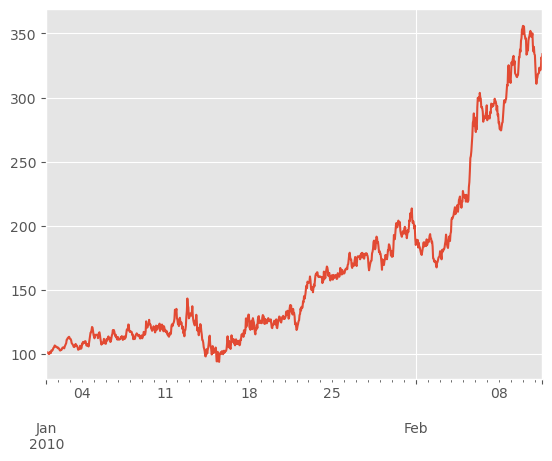

In [23]:
data = sp.heston(
    base_price=100,
    base_volume=5,
    start_date="2010-01-01",
    times_to_generate=1000,
    time_frame='1H'
)

data.close.plot()

## Fractional Brownian Motion

/home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/trade_flow/stochastic/fbm.py:72: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_frame = price_frame["price"].resample(time_frame).ohlc()
/home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/trade_flow/stochastic/fbm.py:73: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_frame["volume"] = volume_frame["volume"].resample(time_frame).sum()


<Axes: >

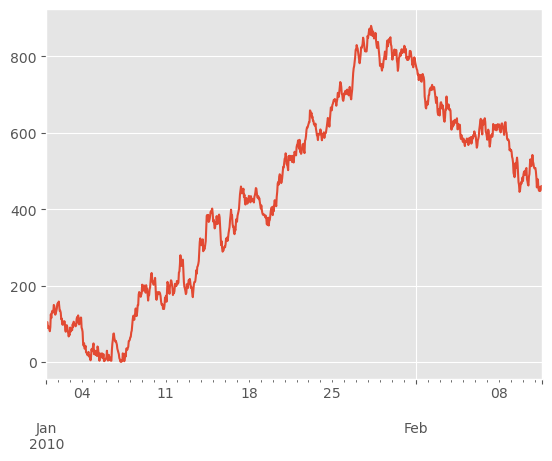

In [24]:
data = sp.fbm(
    base_price=100,
    base_volume=5,
    start_date="2010-01-01",
    times_to_generate=1000,
    time_frame='1H'
)

data.close.plot()

## Cox Ingersoll Ross (CIR)

/home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/trade_flow/stochastic/helpers.py:162: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_frame = price_frame["price"].resample(time_frame).ohlc()
/home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/trade_flow/stochastic/helpers.py:163: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_frame["volume"] = volume_frame["volume"].resample(time_frame).sum()


<Axes: >

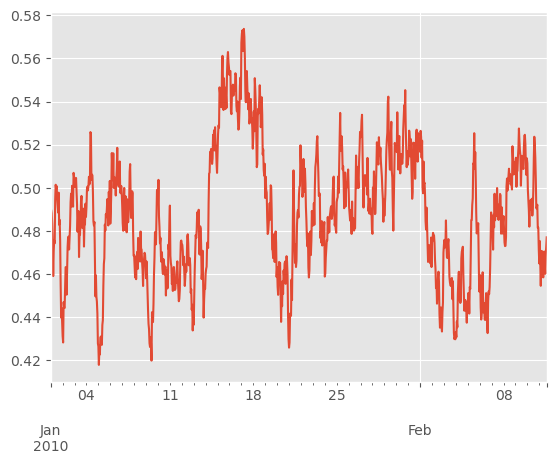

In [25]:
data = sp.cox(
    base_price=100,
    base_volume=5,
    start_date="2010-01-01",
    times_to_generate=1000,
    time_frame='1H'
)

data.close.plot()

## Ornstein Uhlebneck Process

/home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/trade_flow/stochastic/ornstein_uhlenbeck.py:98: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_frame = price_frame["price"].resample(time_frame).ohlc()
/home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/trade_flow/stochastic/ornstein_uhlenbeck.py:99: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_frame["volume"] = volume_frame["volume"].resample(time_frame).sum()


<Axes: >

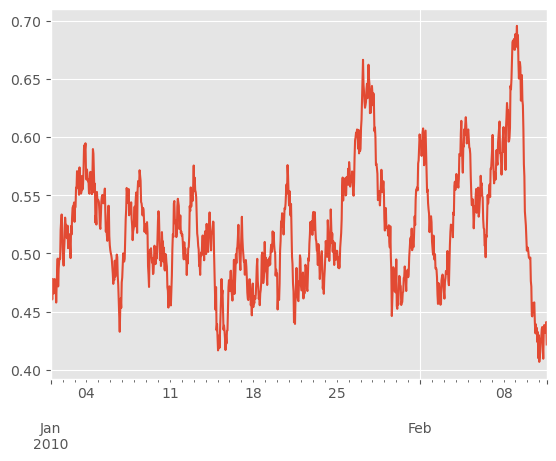

In [26]:
data = sp.ornstein(
    base_price=100,
    base_volume=5,
    start_date="2010-01-01",
    times_to_generate=1000,
    time_frame='1H'
)

data.close.plot()